<a href="https://colab.research.google.com/github/Dulyana-Silva/DataMining-GoogleColab-Practicals/blob/main/Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Titanic')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
df['Age_filled'] = df['Age'].fillna(df['Age'].mean())

# Standard deviation of original Age column
print("Std Dev of Age:", df['Age'].std())

# Standard deviation of filled Age column
print("Std Dev of Age_filled:", df['Age_filled'].std())

Std Dev of Age: 14.526497332334044
Std Dev of Age_filled: 13.002015226002884


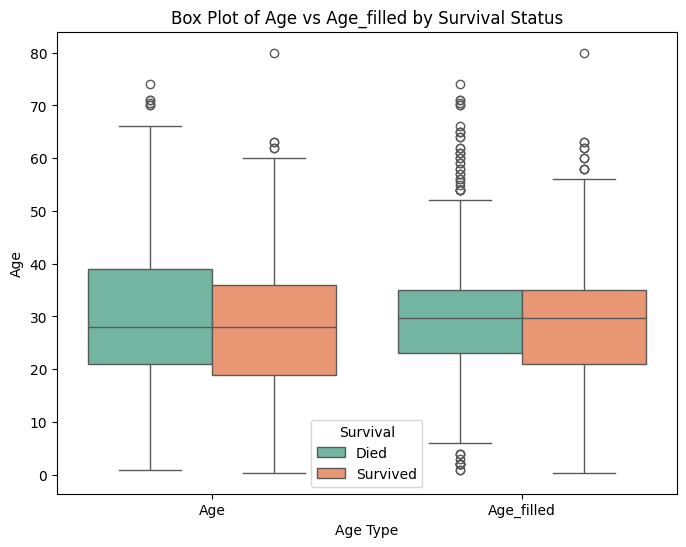

In [24]:
# Convert Survived to string (so seaborn treats it as categorical)
df['Survived_str'] = df['Survived'].map({0: 'Died', 1: 'Survived'})

# Melt the dataframe
df_melted = df[['Survived_str', 'Age', 'Age_filled']].melt(id_vars='Survived_str', var_name='Type', value_name='Value')

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Value', hue='Survived_str', data=df_melted, palette='Set2')

plt.title("Box Plot of Age vs Age_filled by Survival Status")
plt.xlabel("Age Type")
plt.ylabel("Age")
plt.legend(title="Survival")
plt.show()


In [ ]:
df['Cabin_encoded'] = df['Cabin'].notnull().astype(int)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
correlation = df['Cabin_encoded'].corr(df['Survived'])
print("Correlation between encoded Cabin and Survived:", correlation)


Correlation between encoded Cabin and Survived: 0.3169115231122962


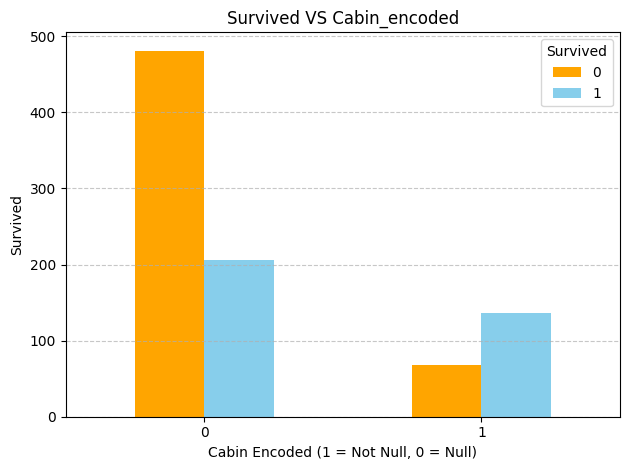

In [ ]:
df.groupby('Cabin_encoded')['Survived'].value_counts().unstack().plot(kind='bar', color=['orange', 'skyblue'])
plt.title('Survived VS Cabin_encoded')
plt.xlabel('Cabin Encoded (1 = Not Null, 0 = Null)')
plt.ylabel('Survived')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [25]:
df.dropna(subset=['Embarked'])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 